In [25]:
# potrzebne biblioteki
import numpy as np
import math
# import matplotlib
import matplotlib.pyplot as plt

# METODA BISEKCJI
### ZNAJDOWANIE PIERWIASTKÓW FUNKCJI

#### Algorytm Bisekcji
dla danej funkcj ___f(x)___    
i wybranych &nbsp; __x<sub>a</sub>__ &nbsp; &nbsp; __x<sub>b</sub>__ &nbsp; takich że:
> __f(x<sub>a</sub>) * f(x<sub>b</sub>) < 0__

wykonaj  
> dane: x<sub>a</sub>, x<sub>b</sub>,  eps &nbsp; &nbsp; (_założono że: x<sub>a</sub> < x<sub>b</sub>_)  
> powtarzaj 
>  dopóki: $ x_{b}-x_{a} > eps$
>> $ x_t= \dfrac{x_{a}+x_{b}}{2} $
>>
>> jeżeli: f(x<sub>a</sub>) * f(x<sub>t</sub>) < 0
>>> $ x_{b}=x_{t}$
>>>
>> jeżeli: f(x<sub>a</sub>) * f(x<sub>t</sub>) > 0
>>>  $ x_{a}=x_{t}$
>>>
>> jeżeli f(x<sub>a</sub>) * f(x<sub>t</sub>) = 0  
>> >  $ x_{a}=x_{b}=x_{t}$


___
##### znajdź pierwiastki :  &nbsp; &nbsp; &nbsp; f(x)=  x<sup>2</sup>- 2.  
_znamy pierwiastki tego równania_
- dla różnych wartości warunku stopu oblicz bład bezwględny i względny względem rozwiązania "ścisłego"

In [26]:
f = lambda x: x**2 - 2    # znamy pierwiastki tego równania ?

<mark>Zmodyfikuj</mark> w komórce poniżej wszystkie zdefiniowane funkcje    
tak żeby nie trezba było liczyć 2 razy iloczynu :
```python
f(a)*f(t)
```

In [27]:
def met_bisekcji(f,a,b,eps):
    # funkcja zwraca wartość x - przybliżone miejsce "zerowe" funkcji f w przedziale <a, b>
    print("Przedział",a," <= x <=",b,"dokladnosc eps=",eps)
    while (b - a) >= eps:
        t=(a+b)/2
        if f(a)*f(t) < 0:
            b=t
        elif f(a)*f(t) > 0:
            a=t
        else:
            a,b=t,t
        print("a =",a,"b=",b, "dx ->",(b-a))    # wydruk kontrolny działana funkcji
    return (b+a)/2

def met_bis_rek(f,a,b,eps):
    # rekurencja
    # funkcja zwraca wartości (a, b) - przedział w którym jest taki x ze f(x) = 0
    if (b - a) >= eps:
        t=(a+b)/2
        if f(a)*f(t) < 0:
            (a,b)=met_bis_rek(f,a,t,eps)
        else:
            (a,b)=met_bis_rek(f,t,b,eps)
    return (a,b)

def metoda_bisekcji_listy(f,a,b,eps):
    # wersja do sprawdzenia przebiegu metody bisekcji
    # funkcja zwraca 3 listy zawierające wartości punktów: początkowych, końcowych, środkowych
    # dla każdego kroku metody buisekcji
    k = 0       # licznik "kroków" metody
    t = (a + b) / 2
    (lista_a,lista_b,lista_t) = ([a],[b],[t])
        # lista_t = [t]
    while ((b - a) >= eps):
        if (f(a)*f(t) < 0):
            b=t
        elif (f(a)*f(t) > 0):
            a=t
        else:
            a,b=t,t
        t= (a + b) / 2
        k=k+1     # zwiększenie k
        lista_a.append(a)
        lista_b.append(b)
        lista_t.append(t)
    #print(k)  # końcowy testowy wydruk liczby "kroków" metody
    return [lista_a,lista_b,lista_t]

In [28]:
x0=0  # dane wejsciowe
x1=3
eps=1e-4

In [29]:
# obliczenia różnymi metodami
print(met_bisekcji(f,x0,x1,eps))

Przedział 0  <= x <= 3 dokladnosc eps= 0.0001
a = 0 b= 1.5 dx -> 1.5
a = 0.75 b= 1.5 dx -> 0.75
a = 1.125 b= 1.5 dx -> 0.375
a = 1.3125 b= 1.5 dx -> 0.1875
a = 1.40625 b= 1.5 dx -> 0.09375
a = 1.40625 b= 1.453125 dx -> 0.046875
a = 1.40625 b= 1.4296875 dx -> 0.0234375
a = 1.40625 b= 1.41796875 dx -> 0.01171875
a = 1.412109375 b= 1.41796875 dx -> 0.005859375
a = 1.412109375 b= 1.4150390625 dx -> 0.0029296875
a = 1.41357421875 b= 1.4150390625 dx -> 0.00146484375
a = 1.41357421875 b= 1.414306640625 dx -> 0.000732421875
a = 1.4139404296875 b= 1.414306640625 dx -> 0.0003662109375
a = 1.41412353515625 b= 1.414306640625 dx -> 0.00018310546875
a = 1.41412353515625 b= 1.414215087890625 dx -> 9.1552734375e-05
1.4141693115234375


In [30]:
print("rekurencyjnie - granice przedziału")
print(" start =",(x0,x1))
(xa,xb)=met_bis_rek(f,x0,x1,eps)
print("(xa,xb)=",(xa,xb))
print("f(xa)=",f(xa),"f(xb)=",f(xb))
print("wart. średnia:  ( f(xa)+f(xb) )/2 =",(f(xa)+f(xb))/2)
print("wart. w środku:   f( (xa+xb)/2 )  =",f((xa+xb)/2))

rekurencyjnie - granice przedziału
 start = (0, 3)
(xa,xb)= (1.41412353515625, 1.414215087890625)
f(xa)= -0.0002546273171901703 f(xb)= 4.314817488193512e-06
wart. średnia:  ( f(xa)+f(xb) )/2 = -0.0001251562498509884
wart. w środku:   f( (xa+xb)/2 )  = -0.00012515834532678127


In [31]:
# analiza błedu dla znanej ścisłej wartości miejsca "zerowego" funkcji
xA,xB=0,2
eps=1e-4
x00=met_bisekcji(f,xA,xB,eps)    # przybliżone x
print()
print("metoda bisekcji x         = ",x00, " z dokładnością :", eps, ", f(x)=",f(x00))
print("miejsce ""zerowe"" -> sqrt(2) = ", np.sqrt(2))
print("bład bezwzględny x        = ", x00 - np.sqrt(2))
print("bład względny argumentu   = ", (x00 - np.sqrt(2))/np.sqrt(2))
print("bład bezwzględny funkcji  = ", f(x00)-0)
print("bład względny funkcji     = ", "????")

Przedział 0  <= x <= 2 dokladnosc eps= 0.0001
a = 1.0 b= 2 dx -> 1.0
a = 1.0 b= 1.5 dx -> 0.5
a = 1.25 b= 1.5 dx -> 0.25
a = 1.375 b= 1.5 dx -> 0.125
a = 1.375 b= 1.4375 dx -> 0.0625
a = 1.40625 b= 1.4375 dx -> 0.03125
a = 1.40625 b= 1.421875 dx -> 0.015625
a = 1.4140625 b= 1.421875 dx -> 0.0078125
a = 1.4140625 b= 1.41796875 dx -> 0.00390625
a = 1.4140625 b= 1.416015625 dx -> 0.001953125
a = 1.4140625 b= 1.4150390625 dx -> 0.0009765625
a = 1.4140625 b= 1.41455078125 dx -> 0.00048828125
a = 1.4140625 b= 1.414306640625 dx -> 0.000244140625
a = 1.4141845703125 b= 1.414306640625 dx -> 0.0001220703125
a = 1.4141845703125 b= 1.41424560546875 dx -> 6.103515625e-05

metoda bisekcji x         =  1.414215087890625  z dokładnością : 0.0001 , f(x)= 4.314817488193512e-06
miejsce zerowe -> sqrt(2) =  1.4142135623730951
bład bezwzględny x        =  1.5255175298545254e-06
bład względny argumentu   =  1.0787037901790862e-06
bład bezwzględny funkcji  =  4.314817488193512e-06
bład względny funkcji     =

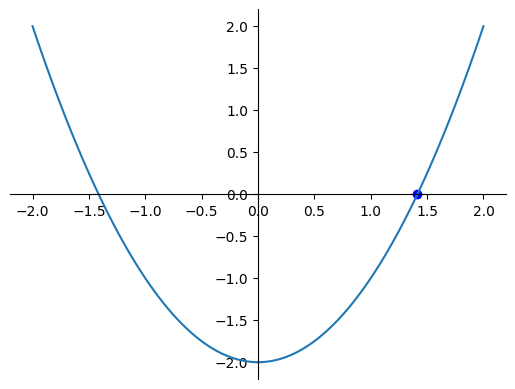

In [32]:
# s = np.arange(-10, 10.05, 0.05)
s = np.linspace(-2, 2., 101)   # punkty podziału x
t = f(s)                       # wartośi f(x)

#opcje rysunku
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines.left.set_position('zero')     # ramki rysunku jako osie
ax.spines.bottom.set_position('zero')
ax.spines.right.set_visible(False)     # niewidoczne ramki rysunku
ax.spines.top.set_visible(False)

xRES = [x00]                     # punkt końcowy algorytmu
yRES=[f(x00)]
# opcje rysowania punktów 
ax.scatter(xRES,yRES,c='b')  # wartości funkcji w pkt. końcowym - kolor niebieski

plt.plot(s, t)
plt.show()

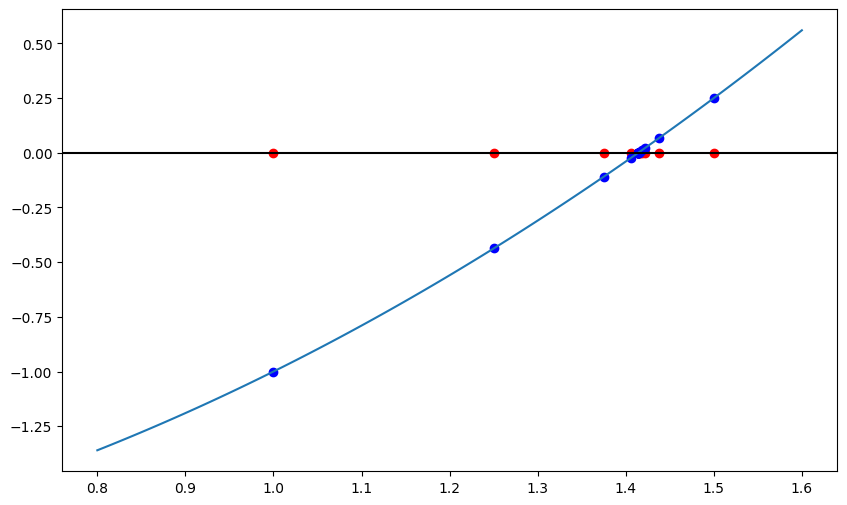

liczba punktów  16


In [33]:
xA,xB=0,2
eps=1e-4

(list_a,list_b,list_t)=metoda_bisekcji_listy(f,xA,xB,eps)
x_data = list_t                    # punkty obliczeń funkcji dla algorytmu
y_data = np.zeros(len(x_data))     # zaznaczenie tych pkt. na osi X
fx_data = np.array([f(i) for i in x_data])   # wartości funkcji w punktach obliczeń

x = np.linspace(0.8, 1.6, 100)  #  punkty podziału dla narysowania wykresu funkcji

fig=plt.figure(figsize=(10,6))    # rozmiary rysunku  UWAGA na skalowanie wartości
ax = fig.add_subplot(1,1,1)
ax.plot(x,f(x))                  # wykres funkcji f(x)

# opcje rysowania
ax.scatter(x_data,y_data,c='r')   # punkty na osi X - kolor czerwony
ax.scatter(x_data,fx_data,c='b')  # wartości funkcji w pkt. obliczeniowych - kolor niebieski

plt.axhline(y=0, color="black")  # oś X
# "narysowanie" rysunku
plt.show()
print("liczba punktów ", len(x_data))

liczba punktów liczenia f(x) : 16


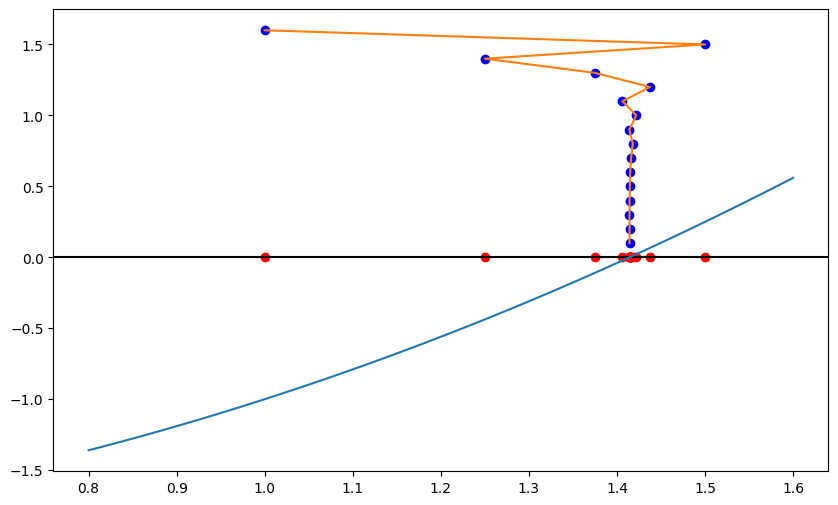

In [34]:
ilePkt=len(list_t)
print("liczba punktów liczenia f(x) :", ilePkt)
fig=plt.figure(figsize=(10,6))    # rozmiary rysunku  UWAGA na skalowanie wartości
ax = fig.add_subplot(1,1,1)

x_data = list_t                   # punkty obliczeń funkcji dla algorytmu
y_data = np.zeros(ilePkt)    # zaznaczenie tych pkt. na osi X
fN_data =ilePkt*0.1-np.arange(0, ilePkt*0.1, 0.1)  # kolejnosc liczenia

# opcje rysowania
ax.scatter(x_data,y_data,c='r')   # punkty na osi X - kolor czerwony
ax.scatter(x_data,fN_data,c='b')  # wartości funkcji w pkt. obliczeniowych - kolor niebieski

plt.axhline(y=0, color="black")  # oś X

plt.plot(x,f(x),x_data,fN_data)
plt.show()